In [1]:
import pandas as pd
import pickle
import string
import matplotlib.pyplot as plt
import seaborn as sns
import tokenizer
import numpy as np
import pandas as pd
import pickle
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
import re
import numpy as np
import multiprocessing 
from multiprocessing import Pool
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
# Import required modules
import pandas as pd
from sklearn import preprocessing
import scipy.stats as stats
import seaborn

[nltk_data] Downloading package punkt to /home/dval/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
with open('non_kp_final_hedonometer.pickle', "rb") as f:
    pakistan = pickle.load(f)

In [3]:
with open('kp_final_hedonometer.pickle', "rb") as f:
    kp = pickle.load(f)

In [5]:
#Create sentiment only dataframe for pakistan and KP
pakistan = pakistan[["created_at", "hedonometer", "hits"]]
kp = kp[["created_at", "hedonometer", "hedo_sd", "hits"]]

In [7]:
#Remove any tweets that were not scored due to having no words in the dictionary(sentiment = 0)
pakistan = pakistan[pakistan["hedonometer"] != 0]
kp = kp[kp["hedonometer"]!=0]

In [9]:
#Prepare dataframes to plot and merge them together
pakistan = pakistan.set_index("created_at")
pakistan = pakistan.resample("D").mean()
pakistan = pakistan["2015-01-01":]

kp = kp.set_index("created_at")
kp = kp.resample("D").mean()
kp = kp["2015-01-01":]

sentiment = pakistan.merge(kp, left_index=True, right_index=True)
sentiment = sentiment.drop(columns = ["hedo_sd"])
sentiment.columns = ["Pakistan Sentiment", "Former Tribal Areas Sentiment"]

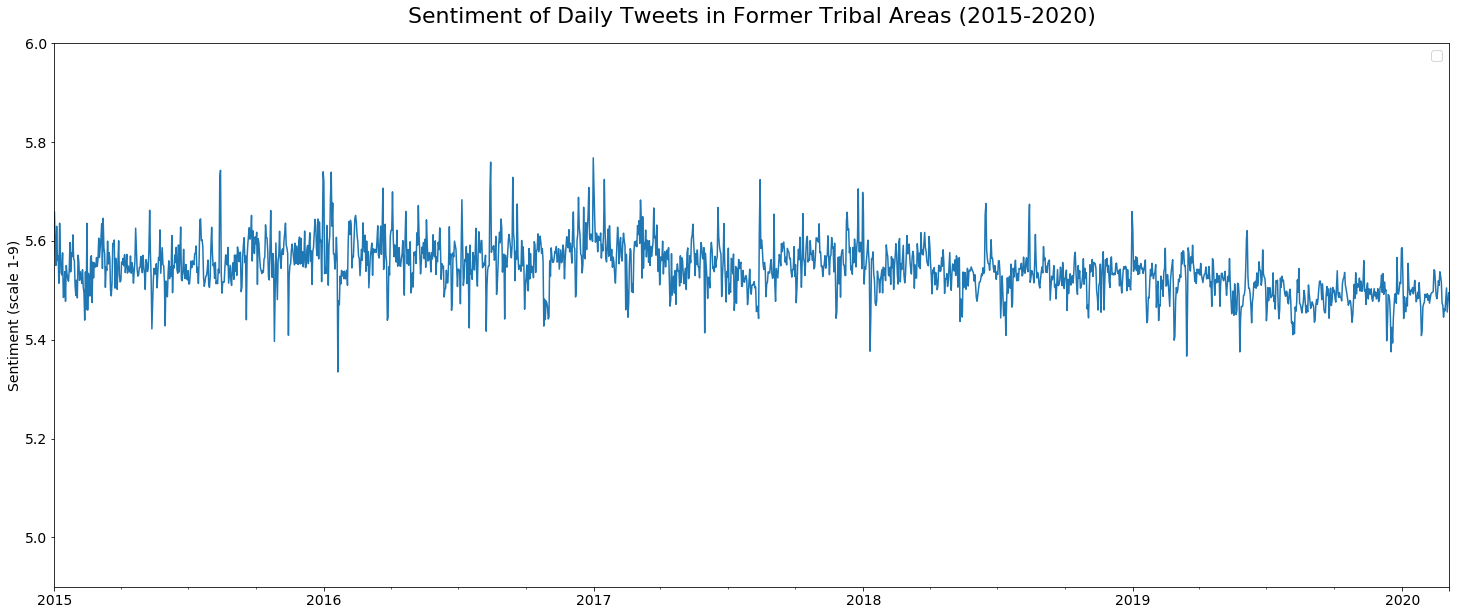

In [168]:
#Plot daily sentiment in KP
cols_plot = ["Former Tribal Areas Sentiment"]
axes = sentiment[cols_plot].plot(marker='', alpha=1, linestyle='-', figsize=(25, 10), subplots=False, legend = True)
axes.set_ylabel('Sentiment (scale 1-9)', fontsize = 14)
axes.set_xlabel('',)
axes.set_title('Sentiment of Daily Tweets in Former Tribal Areas (2015-2020)', fontsize = 22, pad=20)
axes.tick_params(axis='both', which='major', labelsize=14)
axes.legend("",fontsize=14)
plt.ylim(4.9, 6.0) 


 
plt.savefig("Sentiment of Daily Tweets in Former Tribal Areas (2015-2020).pdf", dpi=300, bbox_inches ="tight", transparent=True)

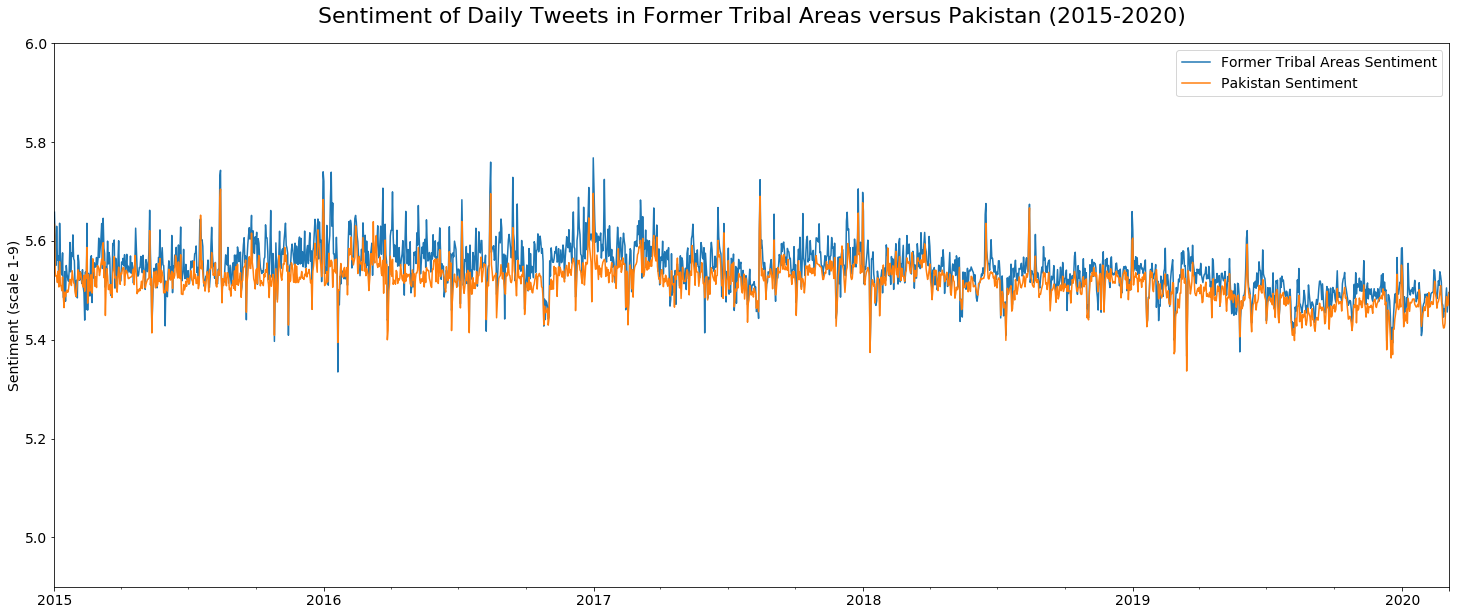

In [201]:
#Plot Sentiment in KP and Pakistan together
cols_plot = ["Former Tribal Areas Sentiment", "Pakistan Sentiment"]
axes = sentiment[cols_plot].plot(marker='', alpha=1, linestyle='-', figsize=(25, 10), subplots=False, legend = True)
axes.set_ylabel('Sentiment (scale 1-9)', fontsize = 14)
axes.set_xlabel('',)
axes.set_title('Sentiment of Daily Tweets in Former Tribal Areas versus Pakistan (2015-2020)', fontsize = 22, pad=20)
axes.tick_params(axis='both', which='major', labelsize=14)
axes.legend(fontsize=14)
plt.ylim(4.9, 6.0) 

 
plt.savefig("Sentiment of Daily Tweets in Former Tribal Areas versus Pakistan (2015-2020).pdf", dpi=300, bbox_inches ="tight", transparent=True)

In [139]:
#Calculate difference between KP and Pakistan Sentiment
sentiment["Former Tribal Areas Normalized"] = sentiment["Former Tribal Areas Sentiment"] - sentiment["Pakistan Sentiment"]

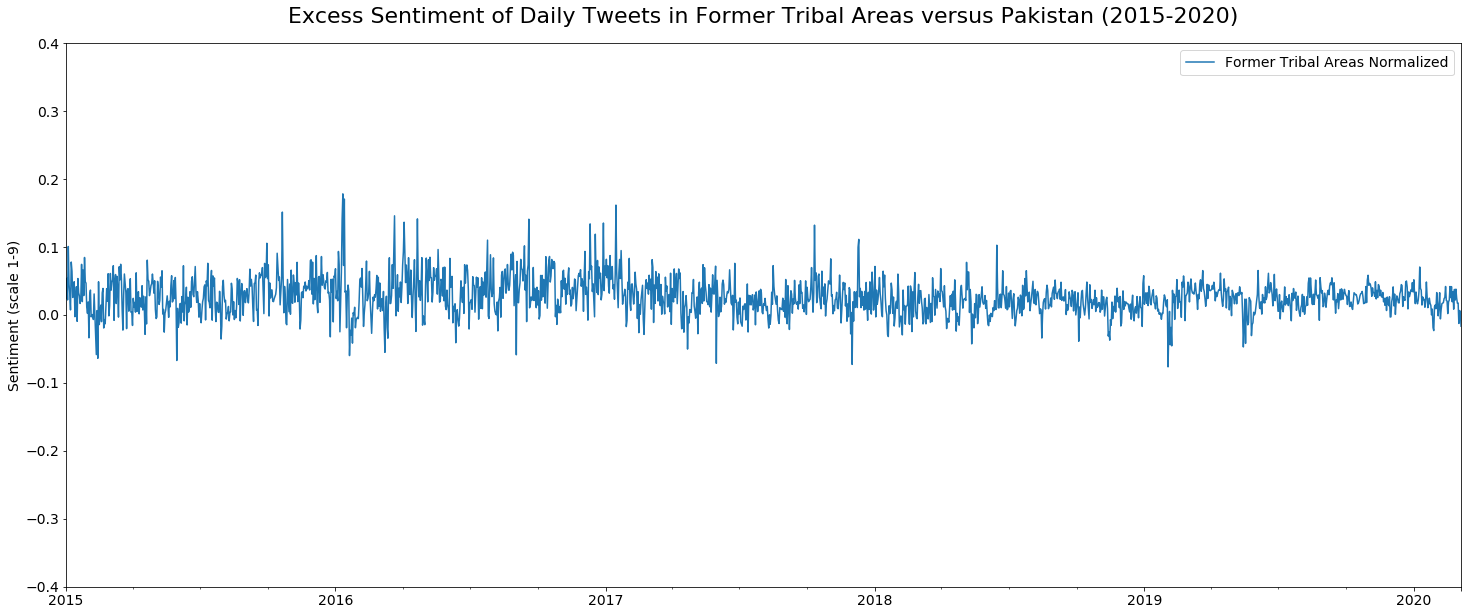

In [140]:
#Plot difference in sentiments normalized at 0
cols_plot = ["Former Tribal Areas Normalized"]
axes = sentiment[cols_plot].plot(marker='', alpha=1, linestyle='-', figsize=(25, 10), subplots=False, legend = True)
axes.set_ylabel('Sentiment (scale 1-9)', fontsize = 14)
axes.set_xlabel('',)
axes.set_title('Excess Sentiment of Daily Tweets in Former Tribal Areas versus Pakistan (2015-2020)', fontsize = 22, pad=20)
axes.tick_params(axis='both', which='major', labelsize=14)
axes.legend(fontsize=14)
plt.ylim(-0.4, 0.4) 

 
plt.savefig("Excess Sentiment of Daily Tweets in Former Tribal Areas versus Pakistan (2015-2020).pdf", dpi=300, bbox_inches ="tight", transparent=True)

In [142]:
#Export sentiments and dates to excel to easily view min/max sentiments for final plot of high/low sentiment events
sentiment.to_excel("sentiment_data.xlsx")  